In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Specify the new folder location with double backslashes
new_folder_path = '/content/drive/MyDrive/A'

for dirname, _, filenames in os.walk(new_folder_path):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)  # Print or process the file path

/content/drive/MyDrive/A/Benign/WBC-Benign-210.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-224.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-126.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-109.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-318.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-453.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-045.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-367.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-236.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-048.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-223.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-108.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-500.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-101.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-023.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-194.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-265.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-144.jpg
/content/drive/MyDrive/A/Benign/WBC-Benign-184.jpg
/content/drive/MyDrive/A/Benign

In [ ]:
%pip install pandas numpy matplotlib scikit-learn tensorflow keras

In [ ]:
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)
# print("Keras version:", keras.__version__)

TensorFlow version: 2.16.1


In [ ]:
%pip install --upgrade tensorflow

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, LearningRateScheduler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
from keras import backend as K

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

In [ ]:
import os
import pandas as pd

Benign_dir = [ r'/content/drive/MyDrive/A/Benign']

Malignant_Pre = [
    r'/content/drive/MyDrive/A/Pre'
]

Malignant_Pro = [
    r'/content/drive/MyDrive/A/Pro'
]

Malignant_early = [
    r'/content/drive/MyDrive/A/Early'
]

filepaths = []
labels = []
dict_lists = [Benign_dir, Malignant_Pre,Malignant_Pro, Malignant_early]
class_labels = ['Benign', 'Malignant_Pre', 'Malignant_Pro', 'Malignant_early']

for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        flist = os.listdir(j)
        for f in flist:
            fpath = os.path.join(j, f)
            filepaths.append(fpath)
            labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
bloodCell_data = pd.concat([Fseries, Lseries], axis=1)
bloodCell_df = pd.DataFrame(bloodCell_data)
print(bloodCell_df.head())
print(bloodCell_df["labels"].value_counts())

                                           filepaths  labels
0  /content/drive/MyDrive/A/Benign/WBC-Benign-210...  Benign
1  /content/drive/MyDrive/A/Benign/WBC-Benign-224...  Benign
2  /content/drive/MyDrive/A/Benign/WBC-Benign-126...  Benign
3  /content/drive/MyDrive/A/Benign/WBC-Benign-109...  Benign
4  /content/drive/MyDrive/A/Benign/WBC-Benign-318...  Benign
labels
Malignant_early    985
Malignant_Pre      963
Malignant_Pro      804
Benign             504
Name: count, dtype: int64


In [ ]:
bloodCell_df.shape

(3256, 2)

In [ ]:
train_images, test_images = train_test_split(bloodCell_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(bloodCell_df, test_size=0.2, random_state=42)

In [ ]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(2604, 2)
(977, 2)
(652, 2)
(2279, 2)


In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

train = image_gen.flow_from_dataframe(
    dataframe=train_set, x_col="filepaths", y_col="labels",
    target_size=(299, 299), color_mode='rgb',
    class_mode="categorical", batch_size=64, shuffle=True
)

val = image_gen.flow_from_dataframe(
    dataframe=val_set, x_col="filepaths", y_col="labels",
    target_size=(299, 299), color_mode='rgb',
    class_mode="categorical", batch_size=64, shuffle=False
)

test = image_gen.flow_from_dataframe(
    dataframe=test_images, x_col="filepaths", y_col="labels",
    target_size=(299, 299), color_mode='rgb',
    class_mode="categorical", batch_size=64, shuffle=False
)

Found 2604 validated image filenames belonging to 4 classes.
Found 652 validated image filenames belonging to 4 classes.
Found 977 validated image filenames belonging to 4 classes.


In [ ]:
classes=list(train.class_indices.keys())
print (classes)

['Benign', 'Malignant_Pre', 'Malignant_Pro', 'Malignant_early']


In [ ]:
%pip install --upgrade keras


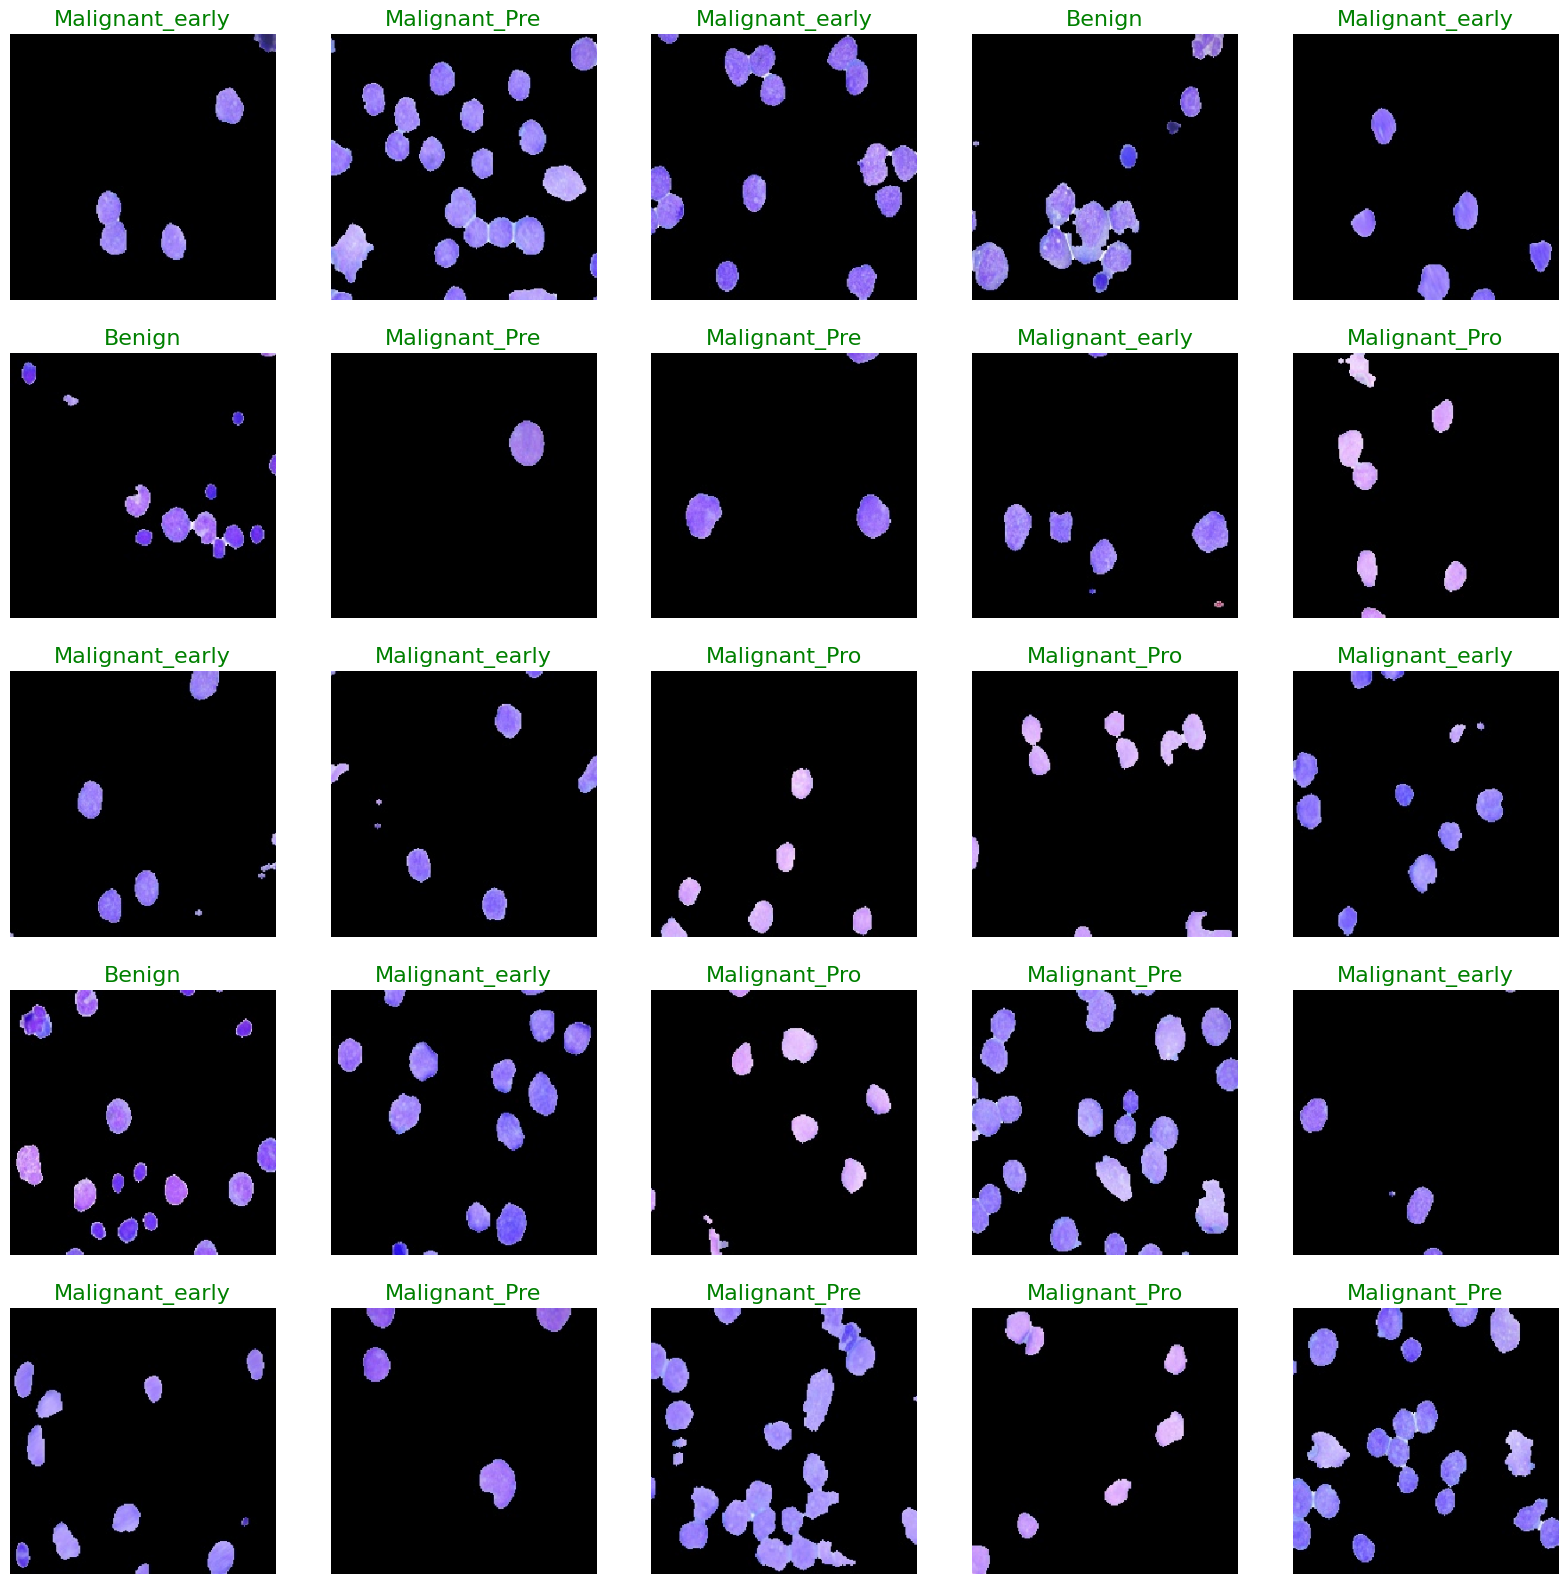

In [ ]:
def show_Blood_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()
show_Blood_images(train)

In [ ]:
!pip install matplotlib tensorflow pandas

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load the InceptionResNetV2 model without the top layer
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze the bottom layers in the base model
for layer in base_model.layers[:-50]:  # Unfreeze the top 50 layers
    layer.trainable = False

# Add new layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Additional dense layers for better learning capacity
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer
predictions = Dense(4, activation='softmax')(x)

# Construct the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a slightly higher learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(train, epochs=40, validation_data=val, callbacks=[early_stopping, lr_reduction], verbose=1)

# Print model summary
model.summary()

Epoch 1/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.3054 - loss: 2.2415 - val_accuracy: 0.3374 - val_loss: 1.3350 - learning_rate: 1.0000e-05
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 96s 866ms/step - accuracy: 0.4018 - loss: 1.8034 - val_accuracy: 0.5000 - val_loss: 1.2194 - learning_rate: 1.0000e-05
Epoch 3/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 787ms/step - accuracy: 0.5054 - loss: 1.4421 - val_accuracy: 0.5613 - val_loss: 1.1179 - learning_rate: 1.0000e-05
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 831ms/step - accuracy: 0.5739 - loss: 1.2605 - val_accuracy: 0.5844 - val_loss: 1.0002 - learning_rate: 1.0000e-05
Epoch 5/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 811ms/step - accuracy: 0.6158 - loss: 1.1117 - val_accuracy: 0.6334 - val_loss: 0.8650 - learning_rate: 1.0000e-05
Epoch 6/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 41s 812ms/step - accuracy: 0.6203 - loss: 1.0802 - val_accuracy: 0.7132 - val_loss: 0.7214 - learning_rate: 1.0000e-05
Epoch 7/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 813ms/step - accur

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 299, 299, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 149, 149, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 149, 149, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 147, 147, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 147, 147, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 73, 73, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 71, 71, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 75,713,262 (288.82 MB)

 Trainable params: 10,224,004 (39.00 MB)

 Non-trainable params: 45,041,248 (171.82 MB)

 Optimizer params: 20,448,010 (78.00 MB)

In [ ]:
loss, accuracy = model.evaluate(test, verbose=1)
print(f"Test accuracy: {accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9165 - loss: 0.2460
Test accuracy: 0.9293756484985352


2/2 ━━━━━━━━━━━━━━━━━━━━ 25s 198ms/step


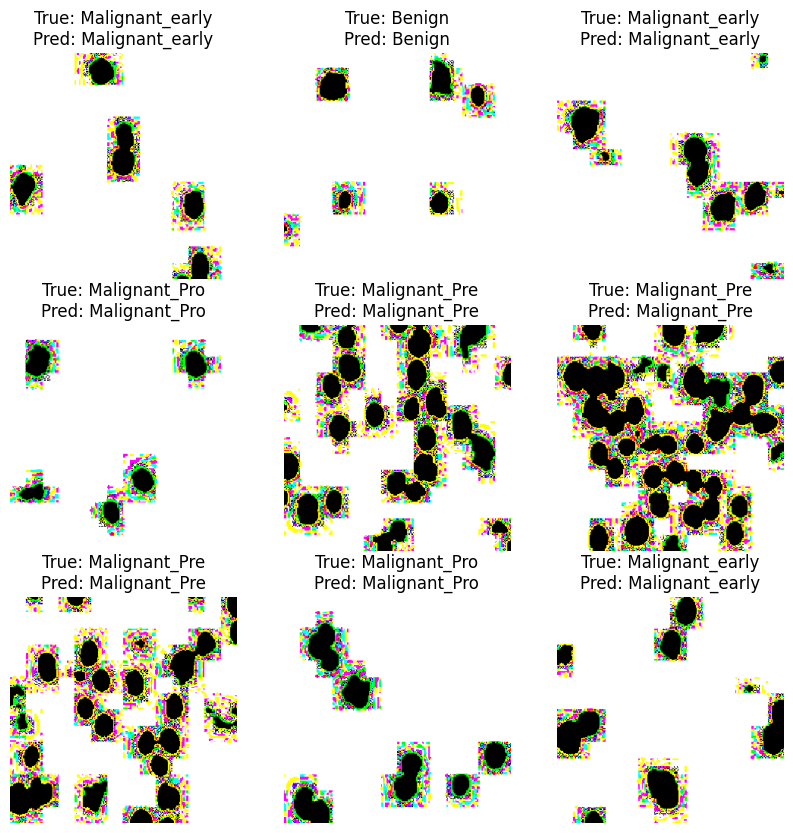

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels from the validation dataset
images, labels = next(iter(val))

# Predict the labels for these images
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

# Class names based on your dataset
class_names = list(train.class_indices.keys())

# Number of images to display
num_images = 9

plt.figure(figsize=(10, 10))
for i in range(num_images):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
    plt.axis("off")

plt.show()

In [ ]:
model.evaluate(test, verbose=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 684ms/step - accuracy: 0.9165 - loss: 0.2460


[0.20266976952552795, 0.9293756484985352]

In [ ]:
model.save("Blood CellInReV2.h5")

In [ ]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1)

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

16/16 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step


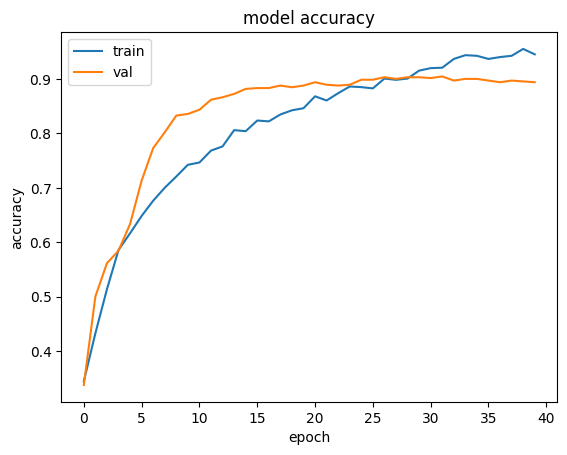

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.savefig('model_accuracy.png')

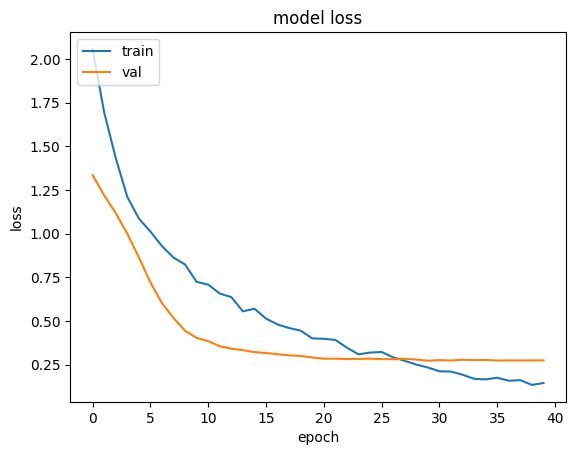

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.savefig('model_loss.png')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

                 precision    recall  f1-score   support

         Benign       0.86      0.82      0.84       171
  Malignant_Pre       0.96      0.96      0.96       288
  Malignant_Pro       0.96      0.98      0.97       226
Malignant_early       0.91      0.93      0.92       292

       accuracy                           0.93       977
      macro avg       0.92      0.92      0.92       977
   weighted avg       0.93      0.93      0.93       977

Accuracy of the Model: 92.9%


In [ ]:
# %pip install seaborn

In [ ]:
#  %pip install --upgrade pip

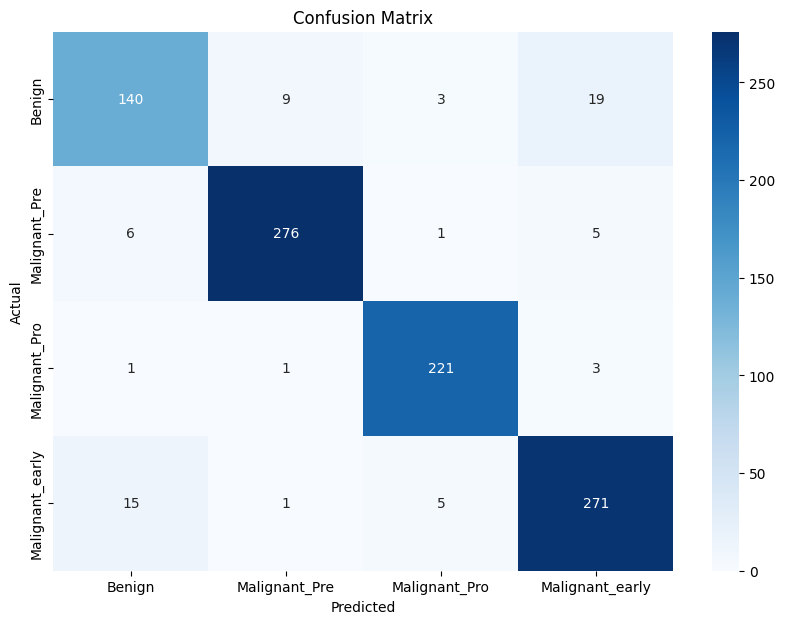

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_labels = ['Benign', 'Malignant_Pre', 'Malignant_Pro', 'Malignant_early']


cm = confusion_matrix(y_test, pred2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()
plt.savefig('model_confusion_matrix.png')